**Yuly Tatiana Rueda Lopez - Jahir Fernando Gutierrez Calderon.**

In [4]:
#SE IMPORTAN LIBRERIAS
import matplotlib.pyplot as plt; 
import pandas  as pd;
import numpy   as np;
import seaborn as sns;
#LIBRERIAS DE AGRUPAMIENTO
from   sklearn.cluster      import KMeans;
from   sklearn.metrics      import silhouette_score;
from   sklearn.metrics      import pairwise_distances_argmin_min;
#IMPRIMIR GRAFICOS EN 3D
from   mpl_toolkits.mplot3d import Axes3D;
#SE CONFIGURA EL TAMAÑO DEL GRAFICO DE CORRELACIÓN
sns.set(rc={'figure.figsize':(16,9)});
plt.rcParams['figure.figsize'] = (16, 9);
plt.style.use('ggplot');

**1. Describa el dataset (El proceso descrito en los datos y cada uno de los campos).**

In [2]:
#SE CARGA EL DATASET CALIDAD DE HTRU_2
data = pd.read_csv('HTRU_2.csv', delimiter=',', decimal='.', header=None, names=['meanPr','desviationPr','kurtosisPr','SkewnessPr','meanCu','desviationCu','kurtosisCu','SkewnessCu', 'Class']);    
datos = pd.DataFrame(data);
#SE MUESTRAN LOS VALORES DEL DATASET Y SU DESCRIPCION 
print('Descripción del dataset: \n\n', datos.describe(include='all'), '\n');

Descripción del dataset: 

              meanPr  desviationPr    kurtosisPr    SkewnessPr        meanCu  \
count  17898.000000  17898.000000  17898.000000  17898.000000  17898.000000   
mean     111.079968     46.549532      0.477857      1.770279     12.614400   
std       25.652935      6.843189      1.064040      6.167913     29.472897   
min        5.812500     24.772042     -1.876011     -1.791886      0.213211   
25%      100.929688     42.376018      0.027098     -0.188572      1.923077   
50%      115.078125     46.947479      0.223240      0.198710      2.801839   
75%      127.085938     51.023202      0.473325      0.927783      5.464256   
max      192.617188     98.778911      8.069522     68.101622    223.392140   

       desviationCu    kurtosisCu    SkewnessCu         Class  
count  17898.000000  17898.000000  17898.000000  17898.000000  
mean      26.326515      8.303556    104.857709      0.091574  
std       19.470572      4.506092    106.514540      0.288432  
min 

**CREADOR**:
Dr Robert Lyon.

**INFO**:

HTRU2 es un conjunto de datos que describe una muestra de los candidatos de púlsares recopilados durante la Encuesta del Universo de Alta Resolución de Tiempo (Sur). 

Los púlsares son un tipo raro de estrella de neutrones que producen emisiones de radio detectables aquí en la Tierra. Tienen un interés científico considerable como sondas del espacio-tiempo, el medio inter-estelar y los estados de la materia. 

A medida que los púlsares giran, su haz de emisión recorre el cielo y, cuando esto cruza nuestra línea de visión, produce un patrón detectable de emisión de radio de banda ancha. A medida que los púlsares 
giran rápidamente, este patrón se repite periódicamente. Por lo tanto, la búsqueda de púlsares implica buscar señales de radio periódicas con grandes radiotelescopios. 

Cada púlsar produce un patrón de emisión ligeramente diferente, que varía ligeramente con cada rotación. Por lo tanto, una detección de señal potencial conocida como "candidato" se promedia a lo largo de muchas rotaciones del púlsar, según lo determinado por la longitud de una observación. En ausencia de información adicional, cada candidato podría potencialmente describir un pulsar real. Sin embargo, en la práctica, casi todas las detecciones son causadas por interferencias de radiofrecuencia (RFI) y ruido, lo que hace que las señales legítimas sean difíciles de encontrar. 

Las herramientas de aprendizaje automático ahora se están utilizando para etiquetar automáticamente a los candidatos a pulsar para facilitar un análisis rápido. Los sistemas de clasificación en particular están siendo ampliamente adoptados, 
que trata los conjuntos de datos candidatos como problemas de clasificación binaria. Aquí, los ejemplos legítimos de púlsares son una clase minoritaria positiva, y los ejemplos espurios la mayoría de clase negativa. Actualmente, las etiquetas de múltiples clases no están disponibles, dados los costos asociados con la anotación de datos. 

El conjunto de datos compartido aquí contiene 16,259 ejemplos falsos causados por RFI / ruido y 1,639 ejemplos de púlsares reales. Todos estos ejemplos han sido verificados por anotadores humanos. 

Los datos se presentan en dos formatos: CSV y ARFF (utilizados por la herramienta de minería de datos WEKA). Los candidatos se almacenan en ambos archivos en filas separadas. Cada fila enumera las variables primero, y la etiqueta de la clase es la entrada final. Las etiquetas de clase utilizadas son 0 (negativa) y 1 (positiva). 

Tenga en cuenta que los datos no contienen información posicional u otros detalles astronómicos. Es simplemente datos de características extraídos de archivos candidatos utilizando la herramienta PulsarFeatureLab.

**ATRIBUTOS**:

1. meanPr: Media del perfil integrado.
2. desviationPr: Desviación estándar del perfil integrado.
3. kurtosisPr: Exceso de curtosis del perfil integrado. 
4. SkewnessPr: Sesgo del perfil integrado. 
5. meanCu: Media de la curva DM-SNR.
6. desviationCu: Desviación estándar de la curva DM-SNR.
7. kurtosisPrCu: Exceso de curtosis de la curva DM-SNR.
8. SkewnessCu: Sesgo de la curva DM-SNR.
9. Class: Clase 

MAPA DE CALOR:



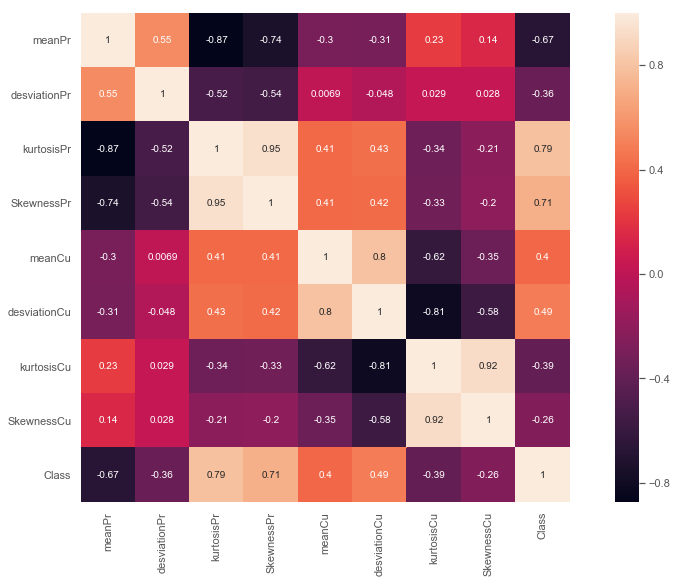

In [5]:
#SE MUESTRA LA RELACION ENTRE LAS VARIABLES Y LA CLASE MEDIANTE UNA MATRIZ DE CONFUSION 
print('MAPA DE CALOR:\n');
sns.heatmap(datos.corr(), square=True, annot=True);

#DATOS PARA X
X = np.array( datos.iloc[:, [2,3,5] ] ) ;
#DATOS OBJETIVO DE CLASE
Y = np.array( datos.iloc[:,8] );

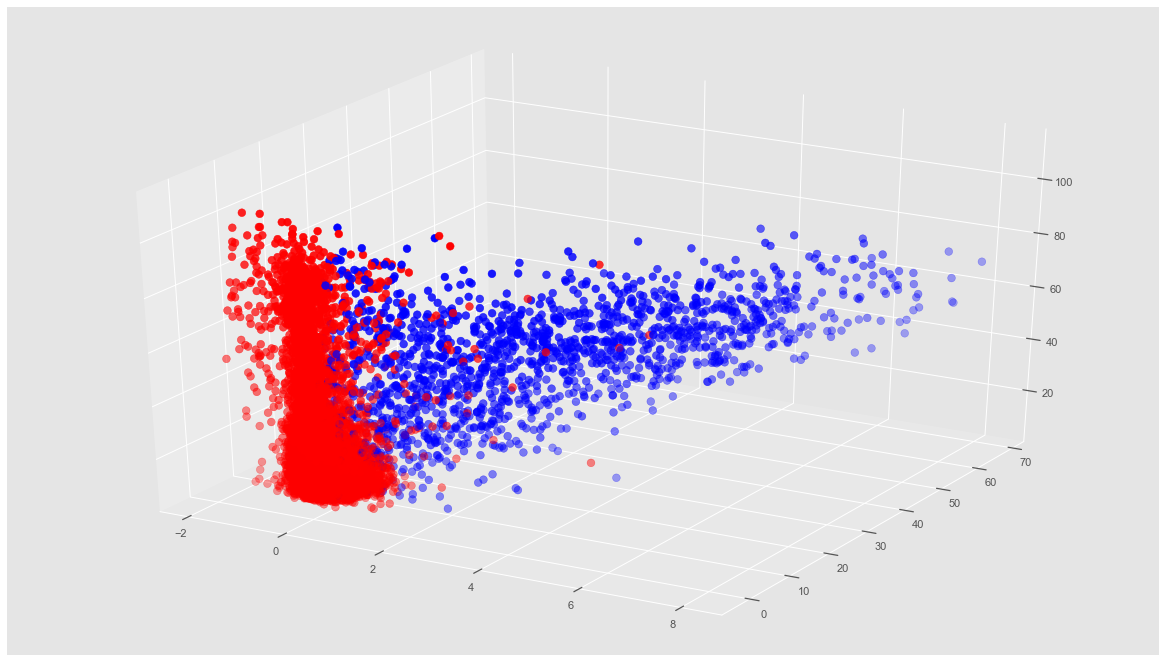

In [6]:
#SE CREA LA FIGURA 
fig = plt.figure();
#SE CONVIERTE EN UN PLANO 3D
ax = Axes3D(fig);
#SE CREA UN ARREGLO DE COLORES QUE SERAN USADOS PARA PINTAR LOS ELEMENTOS ASOCIADOS A UN CENTROIDE DETERMINADO
colores=['red','blue',];
asignar=[];
for row in Y:
    asignar.append(colores[row]);
#SE CREA LA GRAFICA 3D
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

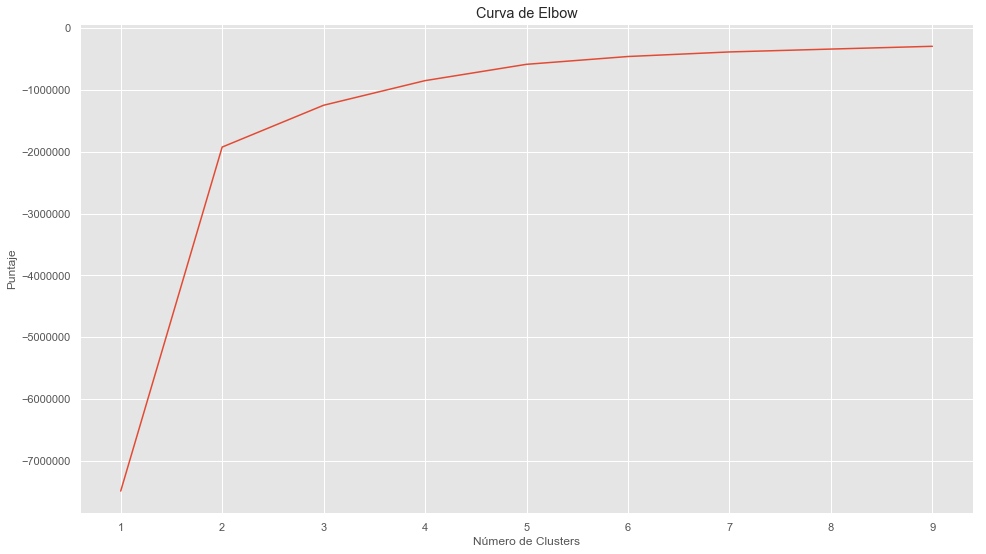

In [7]:
#SE CREA UN RANGO PARA BUSCAR EL VALOR DE K APROPIADO
Nc = range(1, 10);
#SE CREAN LOS CENTROIDES CON BASE EN EL RANGO
kmeans = [ KMeans(n_clusters=i) for i in Nc];
#SE ENTRENA EL ALGORITMO 
score = [ kmeans[i].fit(X).score(X) for i in range( len(kmeans) )];
#SE GRAFICA LOS POSIBLES VALORES DE K SIGUINEDO LA PROPUESTA DE CURVA DE ELBOW
plt.plot( Nc, score );
plt.xlabel('Número de Clusters');
plt.ylabel('Puntaje');
plt.title('Curva de Elbow');
plt.show();

**2. Entrene un modelo de clustering utilizano k-means y variando la proporción usada para entrenar y evaluar el modelo. Debe justificarse la escogencia de los parámetros usados para entrenar el modelo.**

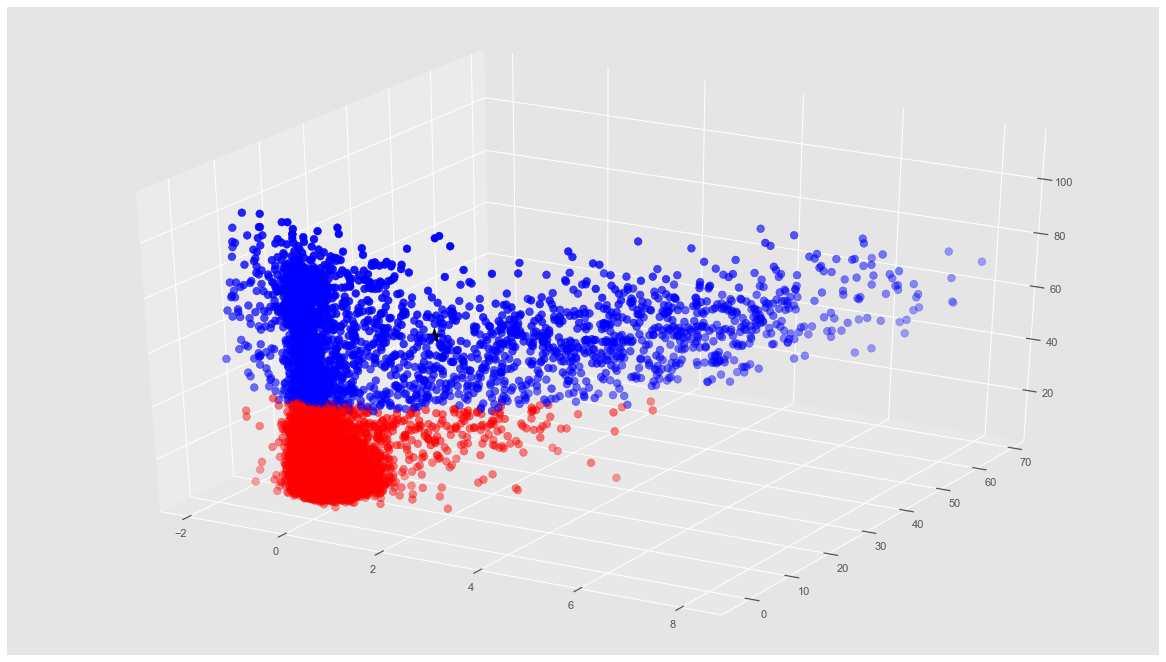

In [8]:
#SE ENTRENA EL PRIMER MODELO  CON UN 10%  DE VERIFICACIÓN
num_training = int( 0.9 * len(X));
num_test = len(X) - num_training;
#SE DIVIDEN LOS DATOS EN ENTRENAMINETO Y VERIFICACION
X_train1  = X[:num_training];
X_test1   = X[num_test:];
#SE ENTRENA EL MODELO
kmeans = KMeans(n_clusters=2).fit(X_train1);
#SE OBTIENEN LOS CENTROIDES
centroids = kmeans.cluster_centers_;
#SE PREDICEN LOS CLUSTERS
labels1 = kmeans.predict(X_test1);
#SE OBTIENEN LOS CENTROIDES
C = kmeans.cluster_centers_;
#SE CREA UN ARREGLO DE COLORES
colores=['red','blue'];
asignar=[];
for row in labels1:
    asignar.append(colores[row]);
#SE CREA LA FIGURA PARA GRAFICAR
fig = plt.figure();
#SE CONVIERTE ESA FIGURA EN 3D
ax = Axes3D(fig)
#SE GRAFICA Y LOS CENTROIDES SE LES ASIGNA UN COLOR NEGRO
ax.scatter(X_test1[:, 0], X_test1[:, 1], X_test1[:, 2], c=asignar, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='black', s=300)

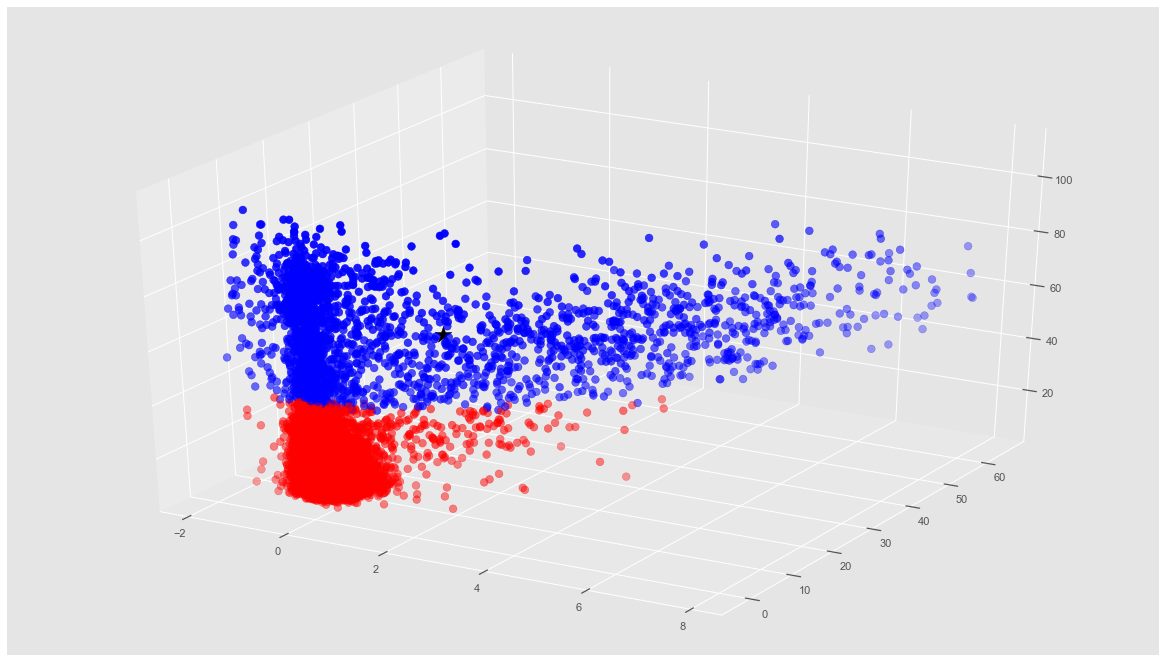

In [9]:
#SE ENTRENA EL PRIMER MODELO  CON UN 20%  DE VERIFICACIÓN
num_training = int( 0.8 * len(X));
num_test = len(X) - num_training;
#SE DIVIDEN LOS DATOS EN ENTRENAMINETO Y VERIFICACION
X_train2  = X[:num_training];
X_test2   = X[num_test:];
#SE ENTRENA EL MODELO
kmeans = KMeans(n_clusters=2).fit(X_train2);
#SE OBTIENEN LOS CENTROIDES
centroids = kmeans.cluster_centers_;
#SE PREDICEN LOS CLUSTERS
labels2 = kmeans.predict(X_test2);
#SE OBTIENEN LOS CENTROIDES
C = kmeans.cluster_centers_;
#SE CREA UN ARREGLO DE COLORES
colores=['red','blue'];
asignar=[];
for row in labels2:
    asignar.append(colores[row]);
#SE CREA LA FIGURA PARA GRAFICAR
fig = plt.figure();
#SE CONVIERTE ESA FIGURA EN 3D
ax = Axes3D(fig)
#SE GRAFICA Y LOS CENTROIDES SE LES ASIGNA UN COLOR NEGRO
ax.scatter(X_test2[:, 0], X_test2[:, 1], X_test2[:, 2], c=asignar, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='black', s=300)

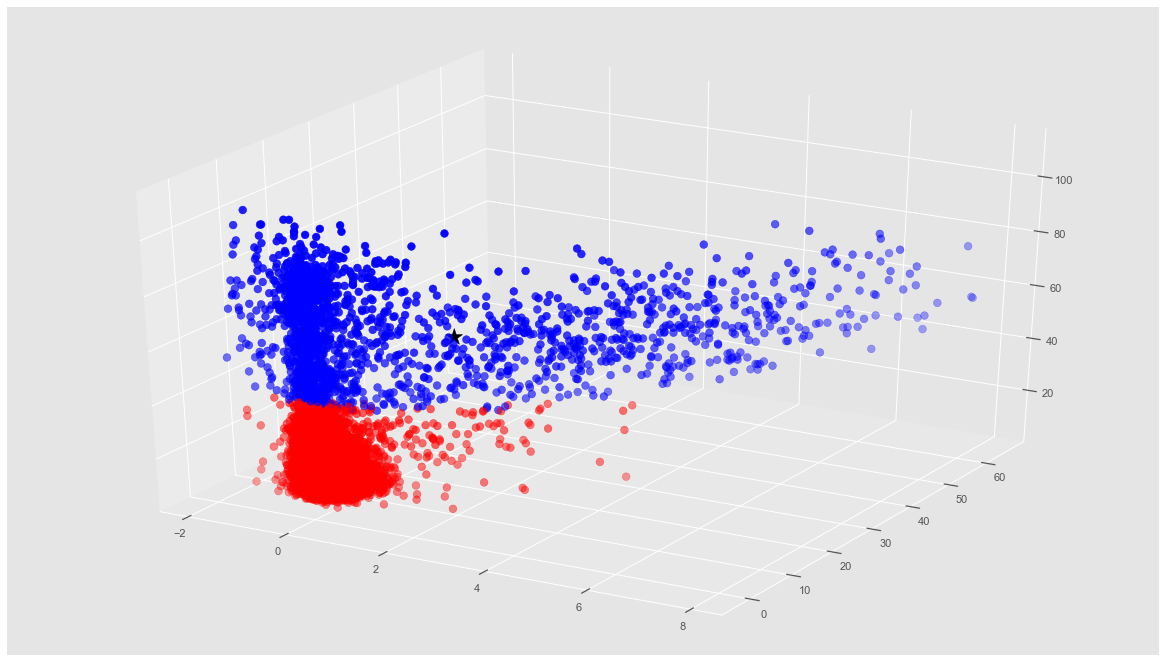

In [11]:
#SE ENTRENA EL PRIMER MODELO  CON UN 30%  DE VERIFICACIÓN
num_training = int( 0.7 * len(X));
num_test = len(X) - num_training;
#SE DIVIDEN LOS DATOS EN ENTRENAMINETO Y VERIFICACION
X_train3  = X[:num_training];
X_test3   = X[num_test:];
#SE ENTRENA EL MODELO
kmeans = KMeans(n_clusters=2).fit(X_train3);
#SE OBTIENEN LOS CENTROIDES
centroids = kmeans.cluster_centers_;
#SE PREDICEN LOS CLUSTERS
labels3 = kmeans.predict(X_test3);
#SE OBTIENEN LOS CENTROIDES
C = kmeans.cluster_centers_;
#SE CREA UN ARREGLO DE COLORES
colores=['red','blue'];
asignar=[];
for row in labels3:
    asignar.append(colores[row]);
#SE CREA LA FIGURA PARA GRAFICAR
fig = plt.figure();
#SE CONVIERTE ESA FIGURA EN 3D
ax = Axes3D(fig)
#SE GRAFICA Y LOS CENTROIDES SE LES ASIGNA UN COLOR NEGRO
ax.scatter(X_test3[:, 0], X_test3[:, 1], X_test3[:, 2], c=asignar, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='black', s=300)

**3. Evalúe la efectividad de cada uno de los modelos.**

In [13]:
#SE OBTIENE LA EFECTIVIDAD DEL COEFICIENTE DE SILUETA, UNA MAYOR PUNTUACION DEL COEFICIENTE DE SILUETA SE RELACIONA CON UN MODELO CON GRUPOS BIEN DEFINIDOS
efectividadModelo1 = silhouette_score(X_test1, labels1, metric='euclidean');
efectividadModelo2 = silhouette_score(X_test2, labels2, metric='euclidean');
efectividadModelo3 = silhouette_score(X_test3, labels3, metric='euclidean');

print("\nEfectividad del modelo con un 10% de datos de prueba: " + str( efectividadModelo1 ) );
print("Efectividad del modelo con un 20% de datos de prueba: " + str( efectividadModelo2 ) );
print("Efectividad del modelo con un 30% de datos de prueba: " + str( efectividadModelo3 ) );


Efectividad del modelo con un 10% de datos de prueba: 0.7767525183054447
Efectividad del modelo con un 20% de datos de prueba: 0.7813021087132824
Efectividad del modelo con un 30% de datos de prueba: 0.7913161939196784


**4. Construya una gráfica que relaciona la cantidad de datos usados para el entrenamiento con la efectividad del modelo. Describa sus hallazgos.**

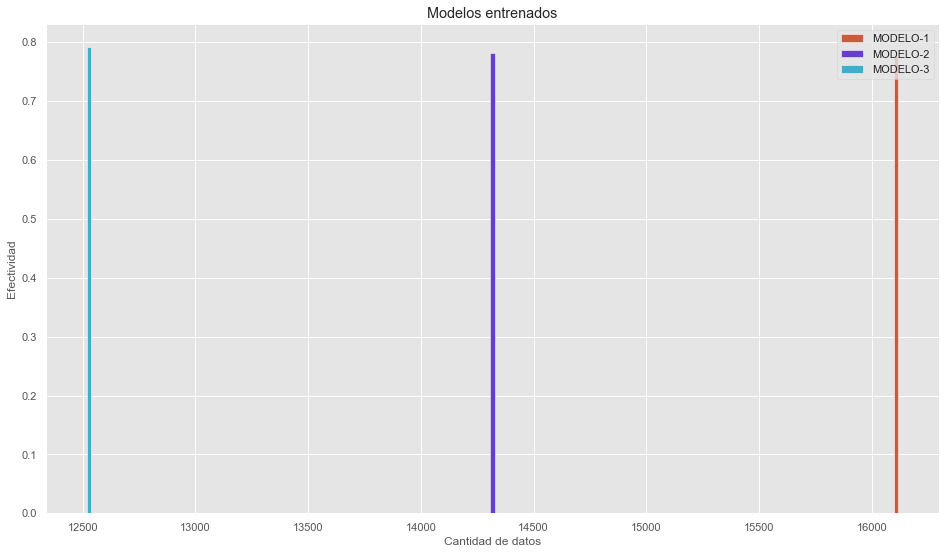

In [15]:
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL PRIMER MODELO
cantidadDatos1erModelo = X.shape[0] - (X.shape[0]*10)/100;
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL SEGUNDO MODELO
cantidadDatos2doModelo = X.shape[0] - (X.shape[0]*20)/100;
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL TERCER MODELO
cantidadDatos3erModelo = X.shape[0] - (X.shape[0]*30)/100;

#SE GRAFICA MEDIANTEBARRAS
plt.bar(cantidadDatos1erModelo, efectividadModelo1, facecolor='#CC5A3E', edgecolor='white',width=20,label='MODELO-1' );
plt.bar(cantidadDatos2doModelo, efectividadModelo2, facecolor='#673ECC', edgecolor='white',width=20,label='MODELO-2');
plt.bar(cantidadDatos3erModelo, efectividadModelo3, facecolor='#3EAECC', edgecolor='white',width=20,label='MODELO-3');

plt.title('Modelos entrenados');
plt.xlabel('Cantidad de datos');
plt.ylabel('Efectividad');
plt.legend(loc='best')
plt.show();

**Como hallazgo se puede observar que el modelo Clustering Kmeans da muy buenos resultados con el dataset elegido llegando hasta un 79% de efectividad del coeficiente de silueta, el cual mide la distancia entre los clusters y al dar un valor cercano al 1+ nos indica que la elección de cada cluster es correcta.**